# سوال اول: تحلیل آب و هوای شهرها

step 1:تولید داده با NumPy & ساخت دیتا فریم با pandas

In [6]:
import numpy as np
import pandas as pd
#columns
city_names = ["Tehran", "Mashhad", "Isfahan", "Tabriz", "Shiraz", "Ahvaz"]
np.random.seed(10)
days = np.array(range(1,31))
daily_temp = np.random.randint(15,40,len(city_names)*30)
humidity = np.random.randint(20,80,len(city_names)*30)
rain_fall = np.random.randint(0,50,len(city_names)*30)
city = np.repeat(city_names,30)
day=np.tile(days,6)
#data frame
df = pd.DataFrame({
    "city":city,
    "day":day,
    "daily_temp":daily_temp,
    "humidity":humidity,
    "rain_fall":rain_fall,

})
df.to_csv("city_weather.csv",index=False)

تحلیل های آماری:step2

In [7]:
weather_mean = df.groupby('city')[["daily_temp","humidity","rain_fall"]].mean()
hotest,coldest =weather_mean['daily_temp'].idxmax(),weather_mean["daily_temp"].idxmin()
rainy_days = df.query('rain_fall > 10')
cities_rainy_day_count = rainy_days.groupby("city")["day"].count()
print(f"1. average temp in all cities \n{weather_mean}\n" )
print(f"2. hotest:\n{weather_mean.loc[hotest]}\n\ncoldest:\n{weather_mean.loc[coldest]}")
print(f"\nrainy days {cities_rainy_day_count}")


1. average temp in all cities 
         daily_temp   humidity  rain_fall
city                                     
Ahvaz     25.866667  49.000000  24.400000
Isfahan   28.833333  50.200000  23.166667
Mashhad   29.200000  52.566667  31.033333
Shiraz    27.066667  49.833333  18.800000
Tabriz    28.000000  44.300000  24.600000
Tehran    26.966667  46.600000  25.066667

2. hotest:
daily_temp    29.200000
humidity      52.566667
rain_fall     31.033333
Name: Mashhad, dtype: float64

coldest:
daily_temp    25.866667
humidity      49.000000
rain_fall     24.400000
Name: Ahvaz, dtype: float64

rainy days city
Ahvaz      26
Isfahan    23
Mashhad    30
Shiraz     21
Tabriz     25
Tehran     23
Name: day, dtype: int64


step 3: رسم نمودار

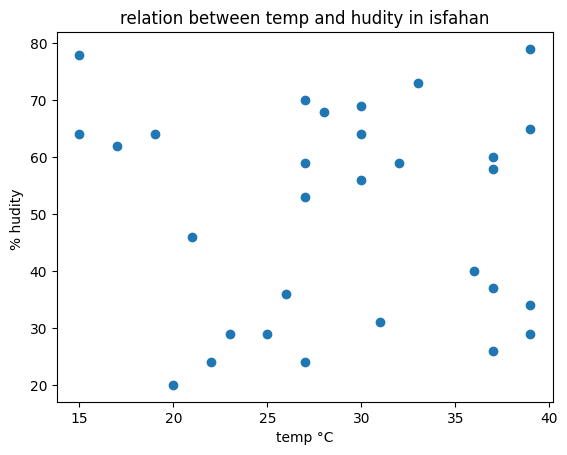

In [ ]:
import matplotlib.pyplot as plt
isfahan = df.query("city == 'Isfahan'")
plt.scatter(x=isfahan["daily_temp"],y=isfahan["humidity"])
plt.xlabel("temp °C")
plt.ylabel("% hudity ")
plt.title("relation between temp and hudity in isfahan")
plt.show()

به نظر بنده رابطه خطی یا غیر خطی بین ایکس و وای یا به عبارتی بین دما و رطوبت دیده نمی شود
 چرا که همبستگی قابل تشخیص نیست و علت آن این است که از داده های رندوم که توسط  کتابخانه نامپای ساخته شده استفاده کردیم 

  # سوال 2: تمیزکاری و تحلیل داده‌های دیابت

step 1: تمیز کاری

In [4]:
import pandas as pd 
df = pd.read_csv("diabetes.csv")
df["Glucose"]=df["Glucose"].fillna(round(df["Glucose"].mean(),1))
df["BloodPressure"]=df["BloodPressure"].fillna(round(df["BloodPressure"].mean(),1))
df["SkinThickness"]=df["SkinThickness"].fillna(round(df["SkinThickness"].mean(),1))
df["Insulin"]=df["Insulin"].fillna(round(df["Insulin"].mean(),1))
df["BMI"]=df["BMI"].fillna(round(df['BMI'].mean(),1))
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    float64
 2   BloodPressure     768 non-null    float64
 3   SkinThickness     768 non-null    float64
 4   Insulin           768 non-null    float64
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,121.7,72.0,35.0,155.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.5,26.6,0.351,31,0
2,8,183.0,64.0,29.2,155.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


step 2 :  رسم heatmap

                Glucose  BloodPressure       BMI       Age   Insulin   Outcome
Glucose        1.000000       0.218513  0.230816  0.265056  0.420371  0.491630
BloodPressure  0.218513       1.000000  0.281287  0.324599  0.072475  0.166069
BMI            0.230816       0.281287  1.000000  0.025498  0.166606  0.311893
Age            0.265056       0.324599  0.025498  1.000000  0.136674  0.238356
Insulin        0.420371       0.072475  0.166606  0.136674  1.000000  0.214399
Outcome        0.491630       0.166069  0.311893  0.238356  0.214399  1.000000


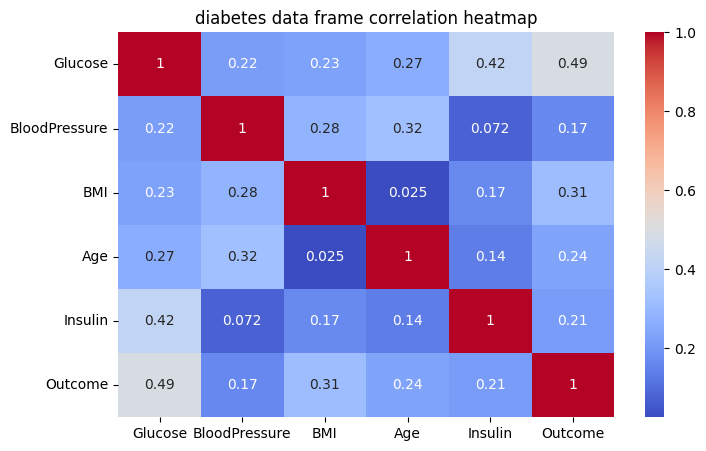

Glucose 0.49


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
important_columns = ["Glucose", "BloodPressure", "BMI", "Age", "Insulin", "Outcome"]

correlation  = df[important_columns].corr()
print(correlation)
plt.figure(figsize=(8,5))
sns.heatmap(correlation,cmap='coolwarm',annot=True)
plt.title('diabetes data frame correlation heatmap')
plt.show()
out_come = correlation["Outcome"]
out_come.drop("Outcome",inplace=True)ن
print(out_come.idxmax(),round(out_come.max(),2))